*Titanic - Naive Base*

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
df_train=pd.read_csv('train_titanic.csv')

In [2]:
df_test=pd.read_csv('test_titanic.csv')

In [3]:
df_full=pd.concat([df_train,df_test])
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
df_full.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

***Dealing with mising values***

In [6]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Need to deal with missing values of Age and Embarked feature**

In [8]:
df_full.drop(columns=['Cabin'],inplace=True)

In [9]:
df_full

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [10]:
df_full.loc[df_full['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


**Count Embarked value **

In [11]:
pd.DataFrame(df_full.Embarked.value_counts())

,Embarked
S,914
C,270
Q,123


**Most passengers were supposed to get off the Titanic at port 'S'. So put 'S' for the two passengers with missing value**

In [12]:
df_full.loc[61,'Embarked'] = 'S'
df_full.loc[829,'Embarked'] = 'S'

In [13]:
df_full['Age'].loc[ (df_full['Pclass'] == 1) & (df_full['Age'].isnull()) & (df_full['Name'].str.contains('Mr. ')) ] = 41
df_full['Age'].loc[ (df_full['Pclass'] == 1) & (df_full['Age'].isnull()) & (df_full['Name'].str.contains('Master. ')) ] = 7
df_full['Age'].loc[ (df_full['Pclass'] == 1) & (df_full['Age'].isnull()) & (df_full['Name'].str.contains('Mrs. ')) ] = 43
df_full['Age'].loc[ (df_full['Pclass'] == 1) & (df_full['Age'].isnull()) & (df_full['Name'].str.contains('Miss. ')) ] = 30

df_full['Age'].loc[ (df_full['Pclass'] == 2) & (df_full['Age'].isnull()) & (df_full['Name'].str.contains('Mr. ')) ] = 32
df_full['Age'].loc[ (df_full['Pclass'] == 2) & (df_full['Age'].isnull()) & (df_full['Name'].str.contains('Master. ')) ] = 3
df_full['Age'].loc[ (df_full['Pclass'] == 2) & (df_full['Age'].isnull()) & (df_full['Name'].str.contains('Mrs. ')) ] = 33.5
df_full['Age'].loc[ (df_full['Pclass'] == 2) & (df_full['Age'].isnull()) & (df_full['Name'].str.contains('Miss. ')) ] = 21

df_full['Age'].loc[ (df_full['Pclass'] == 3) & (df_full['Age'].isnull()) & (df_full['Name'].str.contains('Mr. ')) ] = 28
df_full['Age'].loc[ (df_full['Pclass'] == 3) & (df_full['Age'].isnull()) & (df_full['Name'].str.contains('Master. ')) ] = 6
df_full['Age'].loc[ (df_full['Pclass'] == 3) & (df_full['Age'].isnull()) & (df_full['Name'].str.contains('Mrs. ')) ] = 32
df_full['Age'].loc[ (df_full['Pclass'] == 3) & (df_full['Age'].isnull()) & (df_full['Name'].str.contains('Miss. ')) ] = 17

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

In [14]:
df_full.loc[df_full['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
766,767,0.0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.60,C
88,980,NaN,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.75,Q


**Two entries are null for Age column. Lets Handle these missing values manually depending on fare amount**

In [15]:
df_full.loc[766,'Age'] = 41 # man, first class
df_full.loc[88,'Age'] = 17 # miss, third class

In [16]:
df_full.loc[df_full['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


**Processing Data**


In [17]:
# SEX
df_full['Sex'] = df_full['Sex'].replace('male',1)
df_full['Sex'] = df_full['Sex'].replace('female',0)

# EMBARKED
df_full['Embarked'] = df_full['Embarked'].replace('S',1)
df_full['Embarked'] = df_full['Embarked'].replace('C',2)
df_full['Embarked'] = df_full['Embarked'].replace('Q',3)

In [18]:
df_full

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",1,28.0,0,0,A.5. 3236,8.0500,1
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,2
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,1
416,1308,NaN,3,"Ware, Mr. Frederick",1,28.0,0,0,359309,8.0500,1


**Split data in train and test sample**

In [19]:
df_full=df_full.dropna()
X=df_full[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare']]
y=df_full['Survived']

In [20]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,1,22.0,1,0,7.2500
1,2,1,0,38.0,1,0,71.2833
2,3,3,0,26.0,0,0,7.9250
3,4,1,0,35.0,1,0,53.1000
4,5,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,2,1,27.0,0,0,13.0000
887,888,1,0,19.0,0,0,30.0000
888,889,3,0,17.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [21]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 7), (179, 7), (712,), (179,))

In [24]:
list1=[0.0001,.001,.01,.1,1,10,100,1000]
for i in list1:
    neigh = GaussianNB(var_smoothing=i)
    neigh.fit(X_train, y_train)
    print('alpha value',i)
    print('-'*50)
    y_pred_train=neigh.predict(X_train)
    accuracy=accuracy_score(y_train, y_pred_train)
    print('Accuracy for train data ',accuracy)
    
    y_pred_test=neigh.predict(X_test)
    accuracy=accuracy_score(y_test, y_pred_test)
    print('Accuracy for test data',accuracy)
    print('-'*50)
    print('-'*50)

alpha value 0.0001
--------------------------------------------------
Accuracy for train data  0.6657303370786517
Accuracy for test data 0.6983240223463687
--------------------------------------------------
--------------------------------------------------
alpha value 0.001
--------------------------------------------------
Accuracy for train data  0.6615168539325843
Accuracy for test data 0.6927374301675978
--------------------------------------------------
--------------------------------------------------
alpha value 0.01
--------------------------------------------------
Accuracy for train data  0.6502808988764045
Accuracy for test data 0.6927374301675978
--------------------------------------------------
--------------------------------------------------
alpha value 0.1
--------------------------------------------------
Accuracy for train data  0.6165730337078652
Accuracy for test data 0.6703910614525139
--------------------------------------------------
-------------------------

**Evaluation**


In [25]:
    neigh = GaussianNB(var_smoothing=.01)
    neigh.fit(X_train, y_train)
    print('alpha value',.01)
    print('*'*50)
    y_pred_train=neigh.predict(X_train)
    accuracy=accuracy_score(y_train, y_pred_train)
    c1=confusion_matrix(y_train, y_pred_train)
    f1score_train = f1_score(y_train, y_pred_train, average='weighted')
    print('Accuracy for train data ',accuracy)
    print('F1 score for train data ',f1score_train)

    y_pred_test=neigh.predict(X_test)
    accuracy=accuracy_score(y_test, y_pred_test)
    c2=confusion_matrix(y_test, y_pred_test)
    f1score_test = f1_score(y_test, y_pred_test, average='weighted')
    print('Accuracy for test data',accuracy)
    print('F1 score for test data ',f1score_test)

    print('*'*50)
    print('^'*50)

alpha value 0.01
**************************************************
Accuracy for train data  0.6502808988764045
F1 score for train data  0.5690133738964116
Accuracy for test data 0.6927374301675978
F1 score for test data  0.6191598227220305
**************************************************
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [26]:
print(classification_report(y_train, y_pred_train, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.64      0.97      0.77       430
           1       0.80      0.16      0.26       282

    accuracy                           0.65       712
   macro avg       0.72      0.57      0.52       712
weighted avg       0.70      0.65      0.57       712



In [27]:
print(classification_report(y_test, y_pred_test, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.69      0.97      0.81       119
           1       0.69      0.15      0.25        60

    accuracy                           0.69       179
   macro avg       0.69      0.56      0.53       179
weighted avg       0.69      0.69      0.62       179



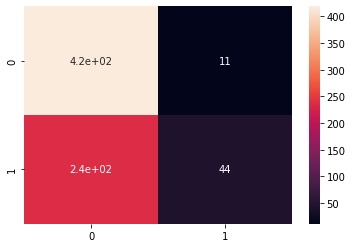

In [28]:
import seaborn as sns
sns.heatmap(c1, annot=True)

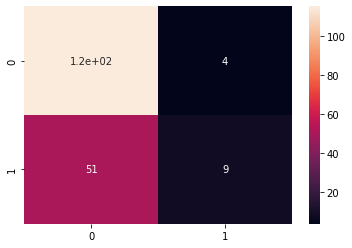

In [29]:
import seaborn as sns
sns.heatmap(c2, annot=True)

In [30]:
X_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
514,515,3,1,24.0,0,0,7.4958
489,490,3,1,9.0,1,1,15.9000
477,478,3,1,29.0,1,0,7.0458
365,366,3,1,30.0,0,0,7.2500
782,783,1,1,29.0,0,0,30.0000
...,...,...,...,...,...,...,...
649,650,3,0,23.0,0,0,7.5500
350,351,3,1,23.0,0,0,9.2250
93,94,3,1,26.0,1,2,20.5750
424,425,3,1,18.0,1,1,20.2125


In [31]:
neigh.predict_proba(X_test)

array([[7.39820688e-01, 2.60179312e-01],
       [7.27183585e-01, 2.72816415e-01],
       [7.43085479e-01, 2.56914521e-01],
       [7.44867374e-01, 2.55132626e-01],
       [7.28054412e-01, 2.71945588e-01],
       [7.48161536e-01, 2.51838464e-01],
       [7.42506188e-01, 2.57493812e-01],
       [7.31959462e-01, 2.68040538e-01],
       [7.45564120e-01, 2.54435880e-01],
       [7.37859602e-01, 2.62140398e-01],
       [7.35522974e-01, 2.64477026e-01],
       [7.45946351e-01, 2.54053649e-01],
       [7.38661210e-01, 2.61338790e-01],
       [7.44998118e-01, 2.55001882e-01],
       [7.43708404e-01, 2.56291596e-01],
       [7.52994580e-01, 2.47005420e-01],
       [5.64911359e-01, 4.35088641e-01],
       [4.55586825e-02, 9.54441318e-01],
       [3.06660188e-01, 6.93339812e-01],
       [7.47085165e-01, 2.52914835e-01],
       [7.43776766e-01, 2.56223234e-01],
       [7.54303870e-01, 2.45696130e-01],
       [7.14508697e-01, 2.85491303e-01],
       [7.42008050e-01, 2.57991950e-01],
       [7.504982